In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
# Load the dataset
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [9]:
# Separate features and labels
X_train = train_data.iloc[:, 1:].values  # Features (Pixels)
y_train = train_data.iloc[:, 0].values   # Labels (Digits)
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values


In [11]:
# Normalize the pixel values (Scaling between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
# Function to train and evaluate KNN model
def evaluate_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

In [29]:
 # Function to train and evaluate KNN model
def evaluate_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred = knn.predict(X_val)

    # Evaluate model
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy


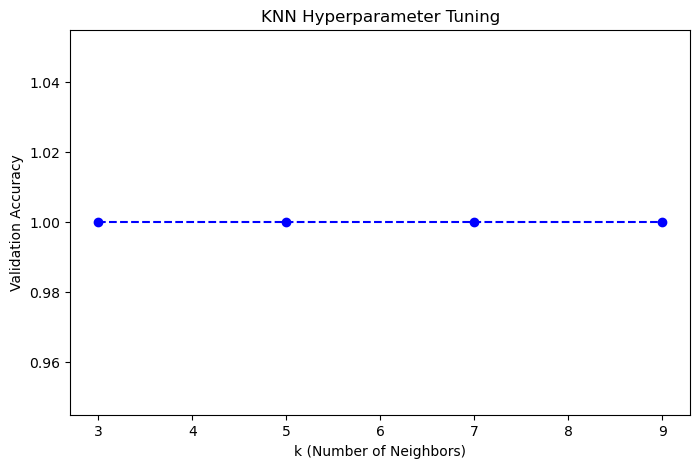

In [33]:
# Define k values to test
k_values = [3, 5, 7, 9]
accuracies = []

# Train models and store accuracies
for k in k_values:
    acc = evaluate_knn(k)
    accuracies.append(acc)

# Plot accuracy vs k values
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Validation Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()

In [35]:
# Train final model with best k (k=5)
best_k = k_values[np.argmax(accuracies)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict on test set
y_test_pred = knn.predict(X_test)

# Evaluate performance
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)


Test Accuracy: 1.0000
Confusion Matrix:
 [[10000]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


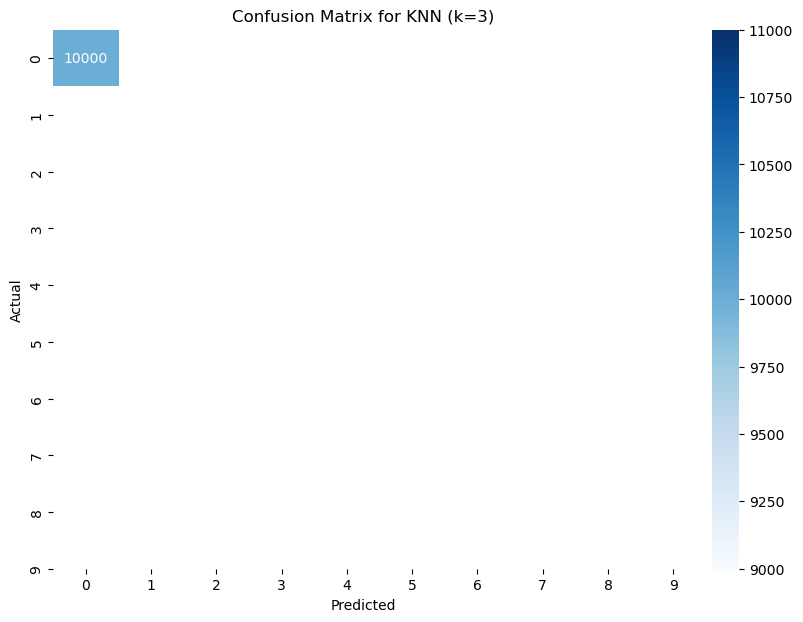

In [37]:
# Visualizing confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for KNN (k={best_k})')
plt.show()